In [1]:
import numpy as np
import pandas as pd

In [ ]:
# Task 1: Build he thong phan loai co do chinh xac cao ve tien gia, tien that

# Task 2: Dua vao cai bien nao la quan trong nhat de biet tien do la that hay gia

In [2]:
bank = pd.read_csv('/Users/khai/Desktop/BankNote_Authentication.csv')
bank.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
bank.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [11]:
bank['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

# Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
features = ['variance','skewness','curtosis','entropy']
target = ['class']

In [6]:
X = bank[features]
y = bank[target]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [15]:
y_train['class'].value_counts()

0    609
1    488
Name: class, dtype: int64

In [16]:
y_test['class'].value_counts()

0    153
1    122
Name: class, dtype: int64

In [17]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [19]:
accuracy_score(y_pred,y_test)

0.9745454545454545

In [42]:
confusion_matrix(y_pred,y_test)

array([[151,   5],
       [  2, 117]])

In [27]:
prediction = {'Real Value':y_test['class'].values,'Model Prediciton': y_pred}
pred_df = pd.DataFrame(prediction)

In [28]:
pred_df

,Real Value,Model Prediciton
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
270,1,1
271,1,1
272,0,0
273,0,0


In [35]:
pred_df[pred_df['Real Value']!=pred_df['Model Prediciton']]

,Real Value,Model Prediciton
36,1,0
87,0,1
88,1,0
107,1,0
157,1,0
160,0,1
170,1,0


In [36]:
bank.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [40]:
new_money = {'variance':3.1,'skewness':-2,'curtosis':1.7,'entropy':-0.2}
new_money_list = [[3.1,-2,1.7,-0.2]]
clf.predict(new_money_list)

array([0])

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

<ipython-input-45-e2ac353d8192>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=500)

In [46]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [47]:
accuracy_score(y_pred_rf,y_test)

0.9963636363636363

In [49]:
confusion_matrix(y_pred_rf,y_test)

array([[152,   0],
       [  1, 122]])

In [50]:
rf.feature_importances_

array([0.55677091, 0.22942635, 0.15642086, 0.05738187])

In [52]:
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=True)
feature_imp

entropy     0.057382
curtosis    0.156421
skewness    0.229426
variance    0.556771
dtype: float64

<AxesSubplot:>

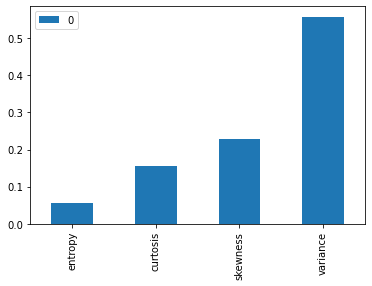

In [54]:
pd.DataFrame(feature_imp).plot(kind='bar')

In [57]:
new_money = {'variance':3.1,'skewness':-2,'curtosis':1.7,'entropy':-0.2}
new_money_list = [[3.1,-2,1.7,-0.2]]
rf.predict(new_money_list)

array([0])

In [ ]:
# parameter tunning 